In [139]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [140]:
offset = 0.5

In [141]:
DM_filename = input("Enter DM file name (excluding .csv extension): ")
DM_filename = DM_filename + '.csv'

In [142]:
# reading the direction map
with open(DM_filename, 'r') as f:
    reader = csv.reader(f)
    data = list(reader)

#remove header
data.pop(0)

rows = int(data[0][0])
cols = int(data[0][1])
data.pop(0)

#extracting the first row
u = []
v = []
for i in range(len(data)):
    u.append(float(data[i][0]))
    v.append(float(data[i][1]))

x = []
y = []
for i in range(rows):
    for j in range(cols):
        x.append(i+offset)
        y.append(j+offset)

print(x)
print(y)

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]


In [143]:
terrain_filename = input("Enter terrain file name (excluding .csv extension): ")
terrain_filename = terrain_filename + '.csv'

In [144]:

with open(terrain_filename, 'r') as f:
    reader = csv.reader(f)
    terrain = list(reader)

obstacles = []

for i in range(len(terrain)):
    for j in range(len(terrain[0]) - 1):
        if float(terrain[i][j]) == 1000000000:
            obstacles.append((i, j))

obstacles_x = []
obstacles_y = []

for i in obstacles:
    obstacles_x.append(i[0] + offset)
    obstacles_y.append(i[1] + offset)
    u[i[0]*cols + i[1]] = 0
    v[i[0]*cols + i[1]] = 0

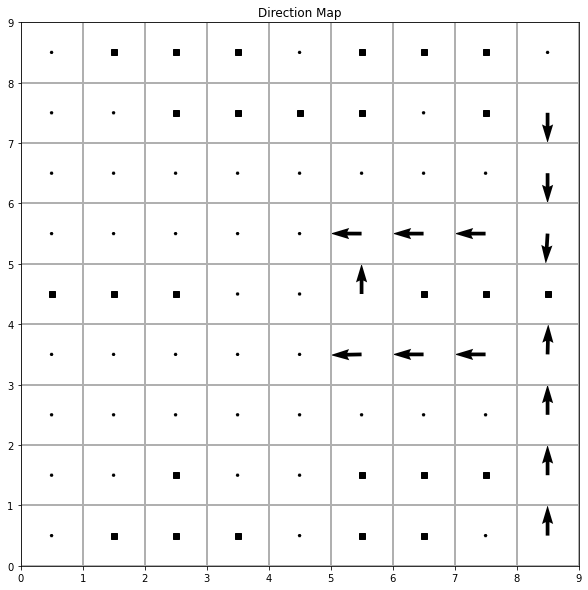

In [145]:
# plt.quiver(x, y, u, v, scale_units='inches', scale=1.5)

#increase the size of plot as number of rows/cols increase
plt.figure(figsize=(rows+1, cols+1))
# fig, ax = plt.subplots()

# adding black boxes in the plot in cells where obstacles are present
for i in range(len(obstacles)):
    plt.plot(obstacles_x[i], obstacles_y[i], 'ks')


plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=2)
plt.title("Direction Map")
plt.xticks(np.arange(0, rows+1, 1))
plt.yticks(np.arange(0, cols+1, 1))
plt.grid(which='both', axis='both', linewidth=2)

plt.savefig('DM_Plot3.png', dpi=300, bbox_inches='tight')
